In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-02.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.942900,6.926168,50.935521,6.932181,2020-02-01 00:31:02,2020-02-01 00:40:02,9.0,923.0,27452485,27455923,31.0,NaN,BIKE 22720,2636
1,50.935521,6.932181,50.924660,6.933403,2020-02-01 02:41:02,2020-02-01 08:20:02,339.0,1211.0,27455923,27460816,121.0,NaN,BIKE 22720,2642
2,50.924660,6.933403,50.922111,6.928496,2020-02-01 14:35:02,2020-02-01 14:41:02,6.0,446.0,27460816,27466929,375.0,NaN,BIKE 22720,2662
3,50.922111,6.928496,50.919618,6.953363,2020-02-01 17:43:02,2020-02-01 17:58:02,15.0,1766.0,27466929,27470929,182.0,NaN,BIKE 22720,2633
4,50.919618,6.953363,50.926601,6.938188,2020-02-01 19:28:02,2020-02-01 19:35:03,7.0,1317.0,27470929,27472936,90.0,NaN,BIKE 22720,2643


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

54434

In [14]:
len(out_distances_total)

7292

In [15]:
len(out_rides)

5741

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

9255

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

3778

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

15.0      68
11.0      65
12.0      65
10.0      60
18.0      58
16.0      56
14.0      56
20.0      56
17.0      52
19.0      49
21.0      48
28.0      47
24.0      47
8.0       46
13.0      44
7.0       44
9.0       44
22.0      43
25.0      43
27.0      41
707.0     40
4.0       38
6.0       38
546.0     38
31.0      38
23.0      37
5.0       37
34.0      37
3.0       36
513.0     35
          ..
4369.0     1
4231.0     1
4497.0     1
4054.0     1
4384.0     1
6548.0     1
7089.0     1
6587.0     1
4895.0     1
3966.0     1
4287.0     1
5379.0     1
4176.0     1
5473.0     1
3508.0     1
5928.0     1
4519.0     1
5708.0     1
4789.0     1
4938.0     1
3180.0     1
7122.0     1
3776.0     1
4451.0     1
6730.0     1
6544.0     1
7478.0     1
5434.0     1
4135.0     1
4018.0     1
Name: distance, Length: 5574, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

3514

In [23]:
len(out_distances + out_rides)

9255

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

17.002241246279898


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 15 columns):
index                   45179 non-null int64
lat_begin               45179 non-null float64
lng_begin               45179 non-null float64
lat_end                 45179 non-null float64
lng_end                 45179 non-null float64
ride_begin              45179 non-null object
ride_end                45179 non-null object
ride_time               45179 non-null float64
distance                45179 non-null float64
uid_begin               45179 non-null int64
uid_end                 45179 non-null int64
standing_before_ride    45179 non-null float64
address                 308 non-null object
name                    45179 non-null object
available_bikes         45179 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 5.2+ MB


In [27]:
df_c['distance'].value_counts()

707.0     40
546.0     38
513.0     35
804.0     35
729.0     35
673.0     34
485.0     34
319.0     33
654.0     33
445.0     33
777.0     33
274.0     33
730.0     33
495.0     33
753.0     32
436.0     32
770.0     32
980.0     32
502.0     32
440.0     32
686.0     31
738.0     31
778.0     31
745.0     31
618.0     31
641.0     31
732.0     31
717.0     31
671.0     31
1179.0    31
          ..
4037.0     1
5708.0     1
5789.0     1
4043.0     1
4825.0     1
4789.0     1
6317.0     1
4770.0     1
3966.0     1
3828.0     1
4895.0     1
6587.0     1
5563.0     1
5860.0     1
6838.0     1
5861.0     1
7497.0     1
5379.0     1
4252.0     1
6264.0     1
2382.0     1
4668.0     1
6672.0     1
4144.0     1
4038.0     1
5436.0     1
6544.0     1
3551.0     1
5474.0     1
4802.0     1
Name: distance, Length: 5365, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

8.0      2207
9.0      2195
7.0      2113
10.0     2039
11.0     1936
6.0      1866
12.0     1843
13.0     1680
14.0     1623
15.0     1503
16.0     1356
17.0     1316
18.0     1262
5.0      1166
19.0     1150
20.0     1078
21.0     1007
22.0      963
24.0      811
23.0      802
25.0      767
26.0      668
27.0      612
28.0      579
29.0      547
31.0      496
30.0      494
32.0      413
4.0       389
33.0      364
         ... 
408.0       1
621.0       1
331.0       1
633.0       1
697.0       1
661.0       1
578.0       1
676.0       1
486.0       1
669.0       1
601.0       1
594.0       1
664.0       1
329.0       1
349.0       1
695.0       1
559.0       1
490.0       1
459.0       1
668.0       1
434.0       1
367.0       1
606.0       1
546.0       1
699.0       1
218.0       1
678.0       1
671.0       1
428.0       1
542.0       1
Name: ride_time, Length: 604, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[62,
 70,
 149,
 158,
 204,
 249,
 297,
 305,
 327,
 399,
 551,
 638,
 640,
 736,
 759,
 796,
 798,
 815,
 831,
 848,
 850,
 852,
 853,
 856,
 914,
 921,
 942,
 962,
 999,
 1047,
 1085,
 1116,
 1165,
 1240,
 1255,
 1311,
 1312,
 1318,
 1341,
 1347,
 1356,
 1378,
 1433,
 1546,
 1632,
 1634,
 1686,
 1687,
 1710,
 1751,
 1766,
 1802,
 1838,
 1841,
 1943,
 1950,
 1968,
 1971,
 1976,
 1985,
 1986,
 1988,
 2021,
 2051,
 2065,
 2091,
 2136,
 2144,
 2148,
 2179,
 2190,
 2208,
 2219,
 2284,
 2420,
 2493,
 2541,
 2543,
 2561,
 2673,
 2716,
 2761,
 2784,
 2795,
 2835,
 2836,
 2847,
 2896,
 2909,
 2912,
 2933,
 2969,
 3047,
 3048,
 3210,
 3240,
 3318,
 3327,
 3333,
 3362,
 3455,
 3500,
 3525,
 3552,
 3585,
 3588,
 3651,
 3656,
 3687,
 3731,
 3752,
 3768,
 3775,
 3776,
 3878,
 3920,
 4071,
 4117,
 4163,
 4172,
 4197,
 4204,
 4249,
 4303,
 4370,
 4376,
 4377,
 4392,
 4405,
 4479,
 4498,
 4508,
 4512,
 4536,
 4565,
 4569,
 4575,
 4579,
 4591,
 4622,
 4715,
 4726,
 4739,
 4742,
 4746,
 4774,
 4797,
 4

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
62,76,50.928113,6.999651,50.925819,6.998590,2020-02-23 08:26:02,2020-02-23 12:30:02,244.0,266.0,27972995,27984561,930.0,NaN,BIKE 21826,2562
70,84,50.932702,6.924890,50.931022,6.923783,2020-02-03 10:43:03,2020-02-03 12:09:02,86.0,202.0,27498568,27503911,178.0,NaN,BIKE 21098,2663
149,174,50.937539,6.998674,50.937683,7.002170,2020-02-06 14:51:02,2020-02-06 15:21:02,30.0,246.0,27583009,27584503,29.0,NaN,BIKE 22030,2617
158,188,50.950906,7.003549,50.948930,7.002416,2020-02-10 14:23:02,2020-02-10 14:45:02,22.0,234.0,27662883,27678085,1154.0,NaN,BIKE 22030,2656
204,242,50.934197,6.991128,50.932075,6.988763,2020-02-20 16:53:01,2020-02-20 17:09:02,16.0,288.0,27914722,27925626,277.0,NaN,BIKE 21951,2550
249,291,50.960842,7.000071,50.961443,7.003595,2020-02-13 06:52:02,2020-02-13 14:23:02,451.0,256.0,27706410,27748844,2139.0,NaN,BIKE 22048,2629
297,346,50.942612,6.999031,50.943192,6.995727,2020-02-03 18:29:03,2020-02-03 18:35:03,6.0,240.0,27511225,27513837,85.0,NaN,BIKE 22813,2641
305,356,50.935551,6.986522,50.933990,6.989908,2020-02-05 17:51:02,2020-02-05 17:56:02,5.0,294.0,27561701,27562158,8.0,NaN,BIKE 22813,2625
327,379,50.964234,6.999775,50.963981,7.002714,2020-02-12 03:09:02,2020-02-12 03:24:03,15.0,208.0,27685551,27712868,1825.0,NaN,BIKE 22813,2650
399,460,50.934310,6.986564,50.931960,6.988611,2020-02-03 11:14:01,2020-02-03 11:54:02,40.0,298.0,27500885,27503102,109.0,NaN,BIKE 22278,2656


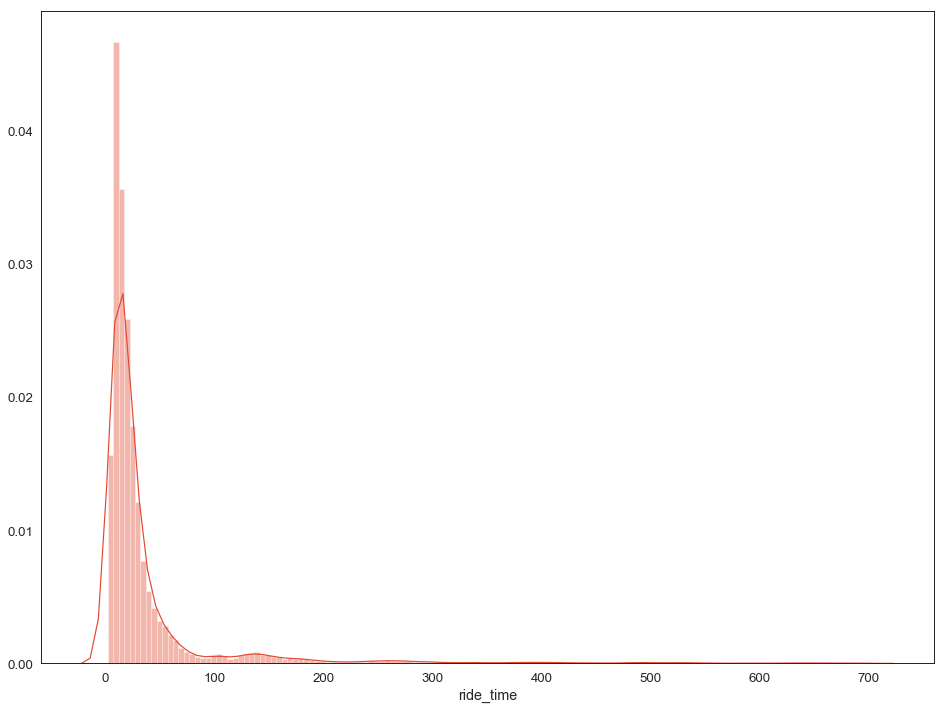

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

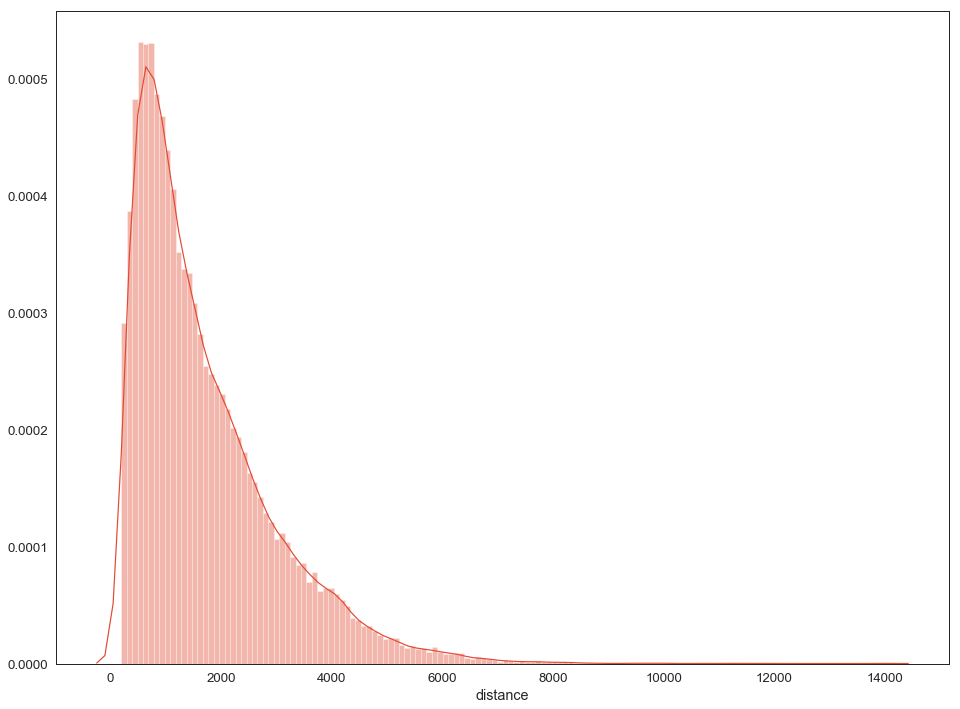

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
105,123,50.950910,6.927818,50.963617,7.012617,2020-02-15 09:36:02,2020-02-15 10:43:02,67.0,6107.0,27758080,27792479,2233.0,"Gutenbergstraße 73, 50823 Köln",BIKE 21098,2597
260,303,50.926118,6.910311,50.934336,6.937213,2020-02-19 09:06:02,2020-02-19 13:10:02,244.0,2096.0,27883909,27888797,414.0,Köln - Lindenthalgürtel 26,BIKE 22048,2612
388,447,50.961574,7.006253,50.951432,7.014146,2020-02-09 15:08:02,2020-02-09 15:17:03,9.0,1256.0,27652859,27658602,301.0,Eulenbergstr. 2,BIKE 21718,2667
536,621,50.961340,6.957125,50.928039,6.928174,2020-02-10 18:20:02,2020-02-10 18:39:03,19.0,4223.0,27682521,27683489,26.0,kühn straße 26,BIKE 22420,2669
537,622,50.928039,6.928174,50.972720,6.950823,2020-02-11 08:05:02,2020-02-11 08:15:02,10.0,5217.0,27683489,27692312,806.0,Köln - Irnfriedweg / Gunterstr.,BIKE 22420,2660
776,900,50.980967,6.950715,50.966544,6.951368,2020-02-15 19:57:02,2020-02-15 20:10:02,13.0,1605.0,27609588,27806894,11445.0,zorndorf straße 14,BIKE 22424,2648
786,912,50.923534,6.926163,50.920576,6.927998,2020-02-18 09:24:02,2020-02-18 09:29:01,5.0,353.0,27861509,27862547,29.0,Zülpicherstr. 218,BIKE 22424,2568
787,913,50.920576,6.927998,50.936283,6.965863,2020-02-18 10:04:02,2020-02-18 10:25:02,21.0,3178.0,27862547,27863743,35.0,Konrad Straße 19,BIKE 22424,2556
1220,1452,50.942001,6.936957,50.948690,6.952142,2020-02-18 16:03:01,2020-02-18 16:35:02,32.0,1298.0,27853570,27872007,242.0,Bismarkstraße 36,BIKE 22401,2578
1337,1595,50.952208,6.952157,50.969769,6.946539,2020-02-01 10:18:02,2020-02-01 10:29:02,11.0,1993.0,27448930,27462543,618.0,Köln - Balthasarstr. / Krefelder Str,BIKE 22081,2636


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
846,997,50.962296,6.999059,50.950872,7.015027,2020-02-21 14:35:01,2020-02-21 14:50:02,15.0,1693.0,27906299,27946295,2432.0,NaN,BIKE 21936,2576
847,998,50.950872,7.015027,50.962375,6.999205,2020-02-21 15:41:02,2020-02-21 16:19:02,38.0,1693.0,27946295,27948409,51.0,NaN,BIKE 21936,2560
2384,2841,50.895379,6.974167,50.907072,6.970394,2020-02-15 23:49:03,2020-02-16 00:07:02,18.0,1327.0,27805742,27810430,264.0,NaN,BIKE 21020,2536
2385,2842,50.907072,6.970394,50.895374,6.974089,2020-02-16 00:13:02,2020-02-16 01:52:03,99.0,1327.0,27810430,27810663,6.0,NaN,BIKE 21020,2564
4186,4997,50.924499,6.922631,50.916687,6.909666,2020-02-09 13:57:02,2020-02-09 14:08:02,11.0,1258.0,27652355,27657139,270.0,NaN,BIKE 21316,2674
4187,4998,50.916687,6.909666,50.924338,6.922879,2020-02-11 07:38:02,2020-02-11 08:13:02,35.0,1258.0,27657139,27691729,2490.0,NaN,BIKE 21316,2663
6778,8152,50.969006,6.913473,50.951963,6.930886,2020-02-18 18:02:01,2020-02-18 18:15:02,13.0,2254.0,27872649,27876054,88.0,NaN,BIKE 22925,2572
6779,8153,50.951963,6.930886,50.969011,6.913491,2020-02-18 18:53:01,2020-02-18 19:08:02,15.0,2254.0,27876054,27877630,38.0,NaN,BIKE 22925,2561
6782,8156,50.966005,6.911114,50.971707,6.914163,2020-02-20 18:50:02,2020-02-20 18:56:02,6.0,669.0,27910141,27928964,857.0,NaN,BIKE 22925,2611
6783,8157,50.971707,6.914163,50.966001,6.911123,2020-02-21 04:22:02,2020-02-21 04:31:02,9.0,669.0,27928964,27935520,566.0,NaN,BIKE 22925,2557


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
931,1108,50.937671,6.939490,51.005975,6.876843,2020-02-21 16:55:02,2020-02-21 17:10:02,15.0,8774.0,27916054,27950229,1824.0,NaN,BIKE 21487,2568,6500.0
4014,4801,50.995846,6.917296,50.966096,6.968396,2020-02-22 01:26:02,2020-02-22 01:30:02,4.0,4874.0,27776419,27959416,10649.0,NaN,BIKE 21550,2562,4000.0
7046,8502,50.957379,6.900902,50.917157,6.921781,2020-02-15 20:52:02,2020-02-15 20:55:01,3.0,4707.0,27645494,27807821,9993.0,NaN,BIKE 21378,2654,1500.0
11381,13738,50.969274,6.938794,50.998217,6.877054,2020-02-22 22:05:01,2020-02-22 22:07:02,2.0,5390.0,27924091,27978652,3231.0,NaN,BIKE 22435,2575,1500.0
11382,13739,50.998217,6.877054,50.968663,6.939363,2020-02-23 10:55:02,2020-02-23 11:02:01,7.0,5463.0,27978652,27986222,768.0,Köln - Longericher Straße,BIKE 22435,2553,4000.0
12337,14842,50.889753,6.994398,50.905234,6.963346,2020-02-05 20:23:02,2020-02-05 20:26:02,3.0,2777.0,27564498,27566223,72.0,Köln - Guntherstrasse,BIKE 21517,2621,1500.0
14236,17132,50.975919,6.946886,50.975217,6.973243,2020-02-14 01:38:02,2020-02-14 01:41:01,3.0,1848.0,27735073,27762245,1677.0,NaN,BIKE 21971,2618,1500.0
15454,18600,50.936615,6.988855,50.935564,7.011049,2020-02-04 22:06:02,2020-02-04 22:08:02,2.0,1560.0,27536169,27541061,246.0,NaN,BIKE 21919,2661,1500.0
16567,19890,50.986977,6.900645,50.950574,6.913203,2020-02-12 19:43:02,2020-02-12 19:45:02,2.0,4144.0,27572755,27733044,9373.0,NaN,BIKE 21466,2656,1500.0
16811,20174,50.998063,6.902106,50.953070,7.013736,2020-02-26 02:08:02,2020-02-26 02:25:01,17.0,9283.0,28036039,28042999,499.0,NaN,BIKE 21997,2564,9000.0


In [46]:
len(unmatched_distances)

32

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                              44844
Wipperfürther Str. 25                                3
Bahnhof Köln Messe/Deutz                             2
Ewaldistraße 19                                      2
Chlodwigplatz                                        2
Köln - Geissbergstr / Klettenberg                    2
Otto-Fischer-Straße 1                                2
Köln - Vondelstr. 6                                  1
 Montanusstraße 1, 51065 Köln                        1
Aachener Str. / Gürtel                               1
S-Bhf Nippes                                         1
Corintostraße, Köln 4                                1
Venloerstr 236 Köln                                  1
Halfengasse 13                                       1
EVERS STRAẞE                                         1
Köln - Herter Str. / Hönninger Weg                   1
Stolberger Str. 374                                  1
Albertus-Magnus-Platz                                1
Höninger W

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-02.csv', sep=';', index=False) 

In [52]:
len(df_c)

45147